In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N=20 #Tamaño del lado
lattice=np.ones((N,N,N)) #Crear la matriz
T=10 #La constante para definir Beta
beta=1./T #Mi beta.

#NOTA: Se adaptó el código de Juan David, por lo que no modifiqué los nombres de variables. 

#Modificación: Se añaden los rolls correspondientes al axis 2, la tercera dimensión de la matriz.
def total_energy(): #La energía total
    global lattice
    return -sum(sum(lattice*(np.roll(lattice,1,axis=1)+np.roll(lattice,-1,axis=1)+np.roll(lattice,1,axis=0)+np.roll(lattice,-1,axis=0)+np.roll(lattice,-1,axis=2)+np.roll(lattice,1,axis=2))))

#Modificación: Se añade el tercer parámetro para la coordenada tridimensional a estudiar.
def block_energy(i,j,k):
    global lattice
    global N
    return -(lattice[i,j,k]*(lattice[(i-1)%N,j,k]+lattice[(i+1)%N,j,k]+lattice[i,(j+1)%N,k]+lattice[i,(j-1)%N,k] + lattice[i,j,(k+1)%N] + lattice[i,j,(k-1)%N]))

#Modificación: Se añade la selección aleatoria de una coordeanda tridimensional.
def flipone():
    global lattice
    global beta
    global N
    # Pick a random site
    nx, ny, nz= np.random.randint(0,N),np.random.randint(0,N), np.random.randint(0,N)
    # Calculate current energy of site and neighbors
    en_i=block_energy(nx,ny,nz)
    # If it were flipped
    en_f=-en_i
    if en_f < en_i: # This could be simplified
        lattice[nx,ny,nz]*=-1
    elif np.random.random() < min(1,np.exp(-beta*(en_f-en_i))):
        lattice[nx,ny,nz]*=-1

#Modificación: Se divide entre el número total de espines nuevos: N^3
def magnetization():
    global lattice
    global N
    return sum(sum(lattice))/N**3

In [9]:
magnetizaciones=[]
lattice=np.ones((N,N,N)) #La nueva matriz de tres dimensiones.
numIter=100*N**2 #Sigo utilizando este número de iteraciones porque soy impaciente :) 
for temp in np.linspace(0.1,8,40): #Límites acordes a la gráfica del enunciado
    T=temp
    beta=1./T
    mag=[]
    for i in range(numIter):
        flipone()
        if i>numIter-10: #Ahora utilizo los últimos 10 estados.
            mag.append(magnetization())
    magnetizaciones.append([T,np.mean(mag)])
magnetizaciones=np.array(magnetizaciones)

In [14]:
#Aquí se crea la línea horizontal constante en 0 para mostrar en la gráfica.
losX=[]
t = linspace(0,8,100)
for __ in range(len(t)):
    losX.append(0)

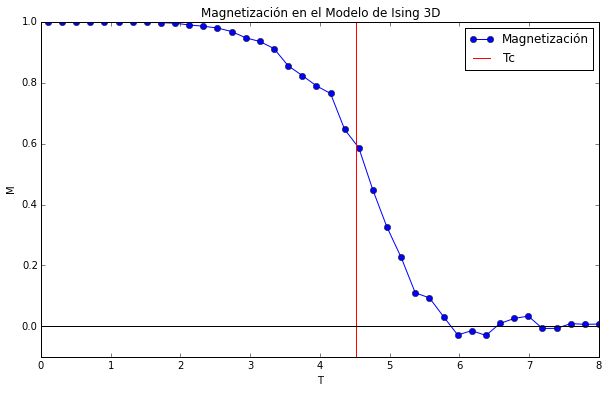

In [13]:
#Presentación de la gráfica
#Mismo estilo que en el ejemplo 2D de Juan David.
plt.figure(figsize=(10,6))
plt.plot(magnetizaciones[:,0],magnetizaciones[:,1], "o-", label = "Magnetización")
plt.xlabel("T")
plt.ylabel("M")
ylim(-0.1,1)
plt.title(u"Magnetización en el Modelo de Ising 3D") 
plt.axvline(4.51, color='red', label = "Tc")
plt.plot(t,losX, color = "Black")
legend()
plt.show()